In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import tqdm

In [11]:
base_df = pd.read_csv("../data/output_files/final_base_df.csv")

In [23]:
varient_list = ["WILDTYPE", "Alpha B.1.1.7",
   "Beta B.1.351",
   "Gamma P.1",
   "Kappa B.1.617.1",
   "Delta B.1.617.2",
   "Lambda C.37",
   "Mu B.1.621",
   "Omicron BA.1",
   "Omicron BA.2",
   "AY.4.2",
   "C.1.2",
   "Eta B.1.525",
   "Iota B.1.526",]

In [14]:
changed_peptides = []
for i, row in tqdm.tqdm(base_df.iterrows(), total=len(base_df)):
    try:
        if(row["varient"] == "Omicron BA.1" and row["start_pos"] >= 214):
            tmp = list(base_df[(base_df["varient"] == "original")&(base_df["start_pos"] == row["start_pos"] -3)&(base_df["end_pos"] == row["end_pos"]-3)]["peptide"])[0]
        else: 
            tmp = list(base_df[(base_df["varient"] == "original")&(base_df["start_pos"] == row["start_pos"])&(base_df["end_pos"] == row["end_pos"])]["peptide"])[0]
    except:
        print("no peptide")
        tmp = ""
    if(row["peptide"] != tmp):
        changed_peptides.append(row["peptide"])
        changed_peptides.append(tmp)
print(changed_peptides) 

 67%|██████▋   | 35778/53094 [05:56<05:05, 56.73it/s] 

no peptide
no peptide
no peptide


 67%|██████▋   | 35794/53094 [05:56<04:23, 65.61it/s]

no peptide
no peptide
no peptide
no peptide
no peptide
no peptide


100%|██████████| 53094/53094 [08:51<00:00, 99.93it/s] 

['VTWFHAIH', 'VTWFHAIHV', 'TWFHAIHS', 'TWFHAIHVS', 'WFHAIHSG', 'WFHAIHVSG', 'FHAIHSGT', 'FHAIHVSGT', 'HAIHSGTN', 'HAIHVSGTN', 'AIHSGTNG', 'AIHVSGTNG', 'IHSGTNGT', 'IHVSGTNGT', 'HSGTNGTK', 'VSGTNGTK', 'NVTWFHAIH', 'NVTWFHAIHV', 'VTWFHAIHS', 'VTWFHAIHVS', 'TWFHAIHSG', 'TWFHAIHVSG', 'WFHAIHSGT', 'WFHAIHVSGT', 'FHAIHSGTN', 'FHAIHVSGTN', 'HAIHSGTNG', 'HAIHVSGTNG', 'AIHSGTNGT', 'AIHVSGTNGT', 'IHSGTNGTK', 'IHVSGTNGTK', 'HSGTNGTKR', 'VSGTNGTKR', 'SNVTWFHAIH', '', 'NVTWFHAIHS', '', 'VTWFHAIHSG', '', 'TWFHAIHSGT', '', 'WFHAIHSGTN', '', 'FHAIHSGTNG', '', 'HAIHSGTNGT', '', 'AIHSGTNGTK', '', 'IHSGTNGTKR', '', 'HSGTNGTKRF', 'VSGTNGTKRF', 'NGTKRFDA', 'NGTKRFDN', 'GTKRFDAP', 'GTKRFDNP', 'TKRFDAPV', 'TKRFDNPV', 'KRFDAPVL', 'KRFDNPVL', 'RFDAPVLP', 'RFDNPVLP', 'FDAPVLPF', 'FDNPVLPF', 'DAPVLPFN', 'DNPVLPFN', 'APVLPFND', 'NPVLPFND', 'TNGTKRFDA', 'TNGTKRFDN', 'NGTKRFDAP', 'NGTKRFDNP', 'GTKRFDAPV', 'GTKRFDNPV', 'TKRFDAPVL', 'TKRFDNPVL', 'KRFDAPVLP', 'KRFDNPVLP', 'RFDAPVLPF', 'RFDNPVLPF', 'FDAPVLPFN', 'FDNPVL

In [27]:
base_df["varient"].replace({"original":"WILDTYPE"}, inplace=True)
print(set(base_df["varient"]))

{'Alpha B.1.1.7', 'Omicron BA.1', 'WILDTYPE', 'Iota B.1.526', 'AY.4.2', 'Gamma P.1', 'Eta B.1.525', 'Kappa B.1.617.1', 'Beta B.1.351', 'Mu B.1.621', 'Omicron BA.2', 'Delta B.1.617.2', 'Lambda C.37', 'C.1.2'}


In [28]:
filtered_df = base_df[base_df.peptide.isin(changed_peptides)]
display(filtered_df)

,Unnamed: 0,peptide,start_pos,end_pos,varient,Chopped,HLA-B*58:01_rank,HLA-A*01:01_rank,HLA-A*24:02_rank,HLA-B*40:01_rank,HLA-B*08:01_rank,HLA-B*27:05_rank,HLA-A*03:01_rank,HLA-A*26:01_rank,HLA-B*39:01_rank,HLA-B*07:02_rank,HLA-A*02:01_rank,HLA-B*15:01_rank,Potential
0,0,MFVFLVLL,1,8,Alpha B.1.1.7,True,40.500,68.333,8.903,44.0,14.162,38.000,55.714,46.250,21.981,24.484,21.618,61.250,0.0
1,1,MFVFLVLL,1,8,Beta B.1.351,True,40.500,68.333,8.903,44.0,14.162,38.000,55.714,46.250,21.981,24.484,21.618,61.250,0.0
2,2,MFVFLVLL,1,8,Gamma P.1,True,40.500,68.333,8.903,44.0,14.162,38.000,55.714,46.250,21.981,24.484,21.618,61.250,0.0
3,3,MFVFLVLL,1,8,Kappa B.1.617.1,True,40.500,68.333,8.903,44.0,14.162,38.000,55.714,46.250,21.981,24.484,21.618,61.250,0.0
4,4,MFVFLVLL,1,8,Delta B.1.617.2,True,40.500,68.333,8.903,44.0,14.162,38.000,55.714,46.250,21.981,24.484,21.618,61.250,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53089,53089,FVFLFLLPLV,2,11,Iota B.1.526,False,57.333,50.968,31.667,49.0,41.278,44.667,32.444,22.789,57.500,73.750,4.153,47.800,0.0
53090,53090,VFLFLLPLVS,3,12,Iota B.1.526,False,74.286,70.000,32.800,85.0,64.091,61.000,31.300,77.500,77.500,75.000,15.627,39.600,0.0
53091,53091,FLFLLPLVSS,4,13,Iota B.1.526,False,71.429,64.524,45.500,75.0,34.939,55.000,25.381,55.714,50.000,59.444,4.385,32.150,0.0
53092,53092,LFLLPLVSSQ,5,14,Iota B.1.526,False,52.857,60.476,36.000,85.0,53.293,51.111,17.580,53.182,75.000,58.333,26.211,24.360,0.0


# Chopped analysis

number of chopped by varient

In [29]:
varient_chopped_counter = {}
for varient in varient_list:
    chopped_counter = len(filtered_df[(filtered_df["varient"] == varient )&(filtered_df["Chopped"] == True)])
    not_chopped_counter = len(filtered_df[(filtered_df["varient"] == varient) & (filtered_df["Chopped"] == False)])
    varient_chopped_counter[varient] = {"chopped":chopped_counter, "not chopped":not_chopped_counter}

print(varient_chopped_counter)

{'WILDTYPE': {'chopped': 65, 'not chopped': 172}, 'Alpha B.1.1.7': {'chopped': 66, 'not chopped': 171}, 'Beta B.1.351': {'chopped': 59, 'not chopped': 178}, 'Gamma P.1': {'chopped': 62, 'not chopped': 175}, 'Kappa B.1.617.1': {'chopped': 62, 'not chopped': 175}, 'Delta B.1.617.2': {'chopped': 62, 'not chopped': 175}, 'Lambda C.37': {'chopped': 57, 'not chopped': 180}, 'Mu B.1.621': {'chopped': 59, 'not chopped': 178}, 'Omicron BA.1': {'chopped': 69, 'not chopped': 177}, 'Omicron BA.2': {'chopped': 0, 'not chopped': 237}, 'AY.4.2': {'chopped': 62, 'not chopped': 175}, 'C.1.2': {'chopped': 59, 'not chopped': 178}, 'Eta B.1.525': {'chopped': 59, 'not chopped': 178}, 'Iota B.1.526': {'chopped': 59, 'not chopped': 178}}


In [30]:
cols = ["varient", "Chopped?","count" ]
rows = []
for var in varient_chopped_counter:
    rows.append([var, True, varient_chopped_counter[var]["chopped"]])
    rows.append([var, False, varient_chopped_counter[var]["not chopped"]])
chopped_counter_df = pd.DataFrame(rows, columns=cols)

% of chopped by original

In [32]:
cols = ["varient", "Chopped?","count" ]
rows = []

original_chopped_counter = varient_chopped_counter["WILDTYPE"]["chopped"]
original_not_chopped_counter = varient_chopped_counter["WILDTYPE"]["not chopped"]

for var in varient_chopped_counter:
    chopped_counter = varient_chopped_counter[var]["chopped"]
    not_chopped_counter = varient_chopped_counter[var]["not chopped"]
    rows.append([var, True, 100*(chopped_counter/original_chopped_counter)-100])
    rows.append([var, False,100*not_chopped_counter/original_not_chopped_counter-100])
chopped_counter_df = pd.DataFrame(rows, columns=cols)

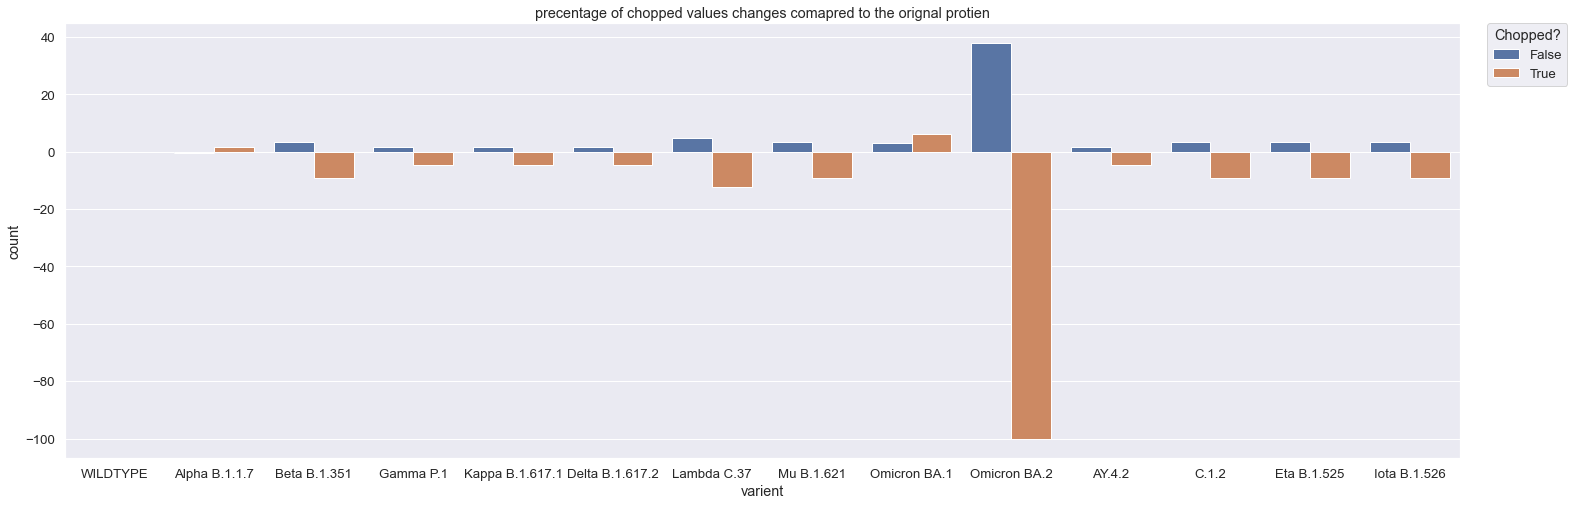

In [33]:
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(25,8)})
sns.set(font_scale = 1.2)
ax = sns.barplot(x="varient", y="count", hue="Chopped?", data=chopped_counter_df)

ax.set_title('precentage of chopped values changes comapred to the orignal protien')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title="Chopped?")
plt.savefig("plots/chopped-varient.png", dpi=500, bbox_inches='tight')


# bro

In [34]:
varient_chopped_counter = {}
for varient in varient_list:
    chopped_counter = len(filtered_df[(filtered_df["varient"] == varient )&(filtered_df["Potential"] > 0)])
    not_chopped_counter = len(filtered_df[(filtered_df["varient"] == varient) & (filtered_df["Potential"] == 0)])
    varient_chopped_counter[varient] = {"chopped":chopped_counter, "not chopped":not_chopped_counter}

print(varient_chopped_counter)

{'WILDTYPE': {'chopped': 43, 'not chopped': 194}, 'Alpha B.1.1.7': {'chopped': 45, 'not chopped': 192}, 'Beta B.1.351': {'chopped': 43, 'not chopped': 194}, 'Gamma P.1': {'chopped': 25, 'not chopped': 212}, 'Kappa B.1.617.1': {'chopped': 43, 'not chopped': 194}, 'Delta B.1.617.2': {'chopped': 43, 'not chopped': 194}, 'Lambda C.37': {'chopped': 61, 'not chopped': 176}, 'Mu B.1.621': {'chopped': 43, 'not chopped': 194}, 'Omicron BA.1': {'chopped': 43, 'not chopped': 203}, 'Omicron BA.2': {'chopped': 43, 'not chopped': 194}, 'AY.4.2': {'chopped': 43, 'not chopped': 194}, 'C.1.2': {'chopped': 43, 'not chopped': 194}, 'Eta B.1.525': {'chopped': 43, 'not chopped': 194}, 'Iota B.1.526': {'chopped': 43, 'not chopped': 194}}


In [35]:
cols = ["varient", "Chopped?","count" ]
rows = []
for var in varient_chopped_counter:
    rows.append([var, True, varient_chopped_counter[var]["chopped"]])
    rows.append([var, False, varient_chopped_counter[var]["not chopped"]])
chopped_counter_df = pd.DataFrame(rows, columns=cols)

% of chopped by original

In [37]:
cols = ["varient", "Chopped?","count" ]
rows = []

original_chopped_counter = varient_chopped_counter["WILDTYPE"]["chopped"]
original_not_chopped_counter = varient_chopped_counter["WILDTYPE"]["not chopped"]

for var in varient_chopped_counter:
    chopped_counter = varient_chopped_counter[var]["chopped"]
    not_chopped_counter = varient_chopped_counter[var]["not chopped"]
    rows.append([var, True, 100*(chopped_counter/original_chopped_counter)-100])
    rows.append([var, False,100*not_chopped_counter/original_not_chopped_counter-100])
chopped_counter_df = pd.DataFrame(rows, columns=cols)

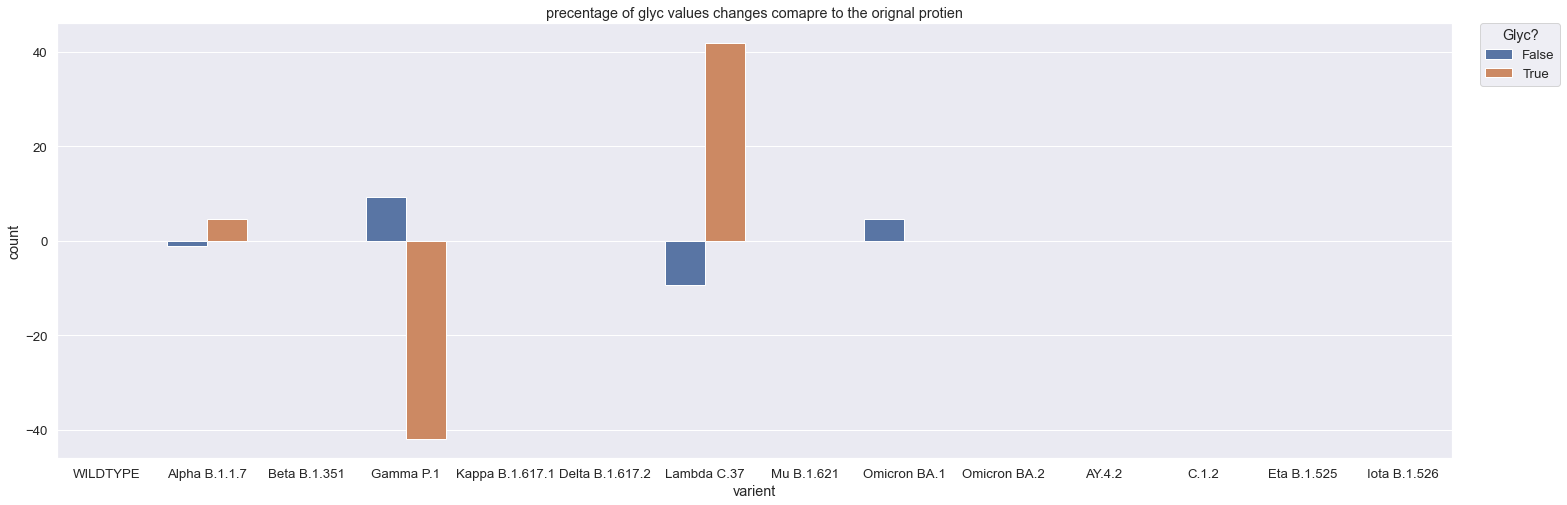

In [38]:
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(25,8)})
sns.set(font_scale = 1.2)
ax = sns.barplot(x="varient", y="count", hue="Chopped?", data=chopped_counter_df)

ax.set_title('precentage of glyc values changes comapre to the orignal protien')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title="Glyc?")
plt.savefig("plots/glyc-varient.png", dpi=500, bbox_inches='tight')


# NetMHCPan anlysis

boxplor ranks mean

In [40]:
MHC_TYPES = [i for i in list(set(filtered_df.columns)) if i.startswith("H")]


In [41]:
new_list = []
for i, row in filtered_df.iterrows():
    tmp_list = []
    for mhc_type in MHC_TYPES:
        #tmp_list.append(row[mhc_type])    
        new_list.append([row[mhc_type], row["varient"]])


cols = ["rank", "varient"]
box_df = pd.DataFrame(new_list, columns=cols)
binders_df = box_df[box_df["rank"] <=2]
display(box_df)
display(binders_df)

,rank,varient
0,68.333,Alpha B.1.1.7
1,40.500,Alpha B.1.1.7
2,21.618,Alpha B.1.1.7
3,21.981,Alpha B.1.1.7
4,44.000,Alpha B.1.1.7
...,...,...
39919,40.143,Iota B.1.526
39920,20.161,Iota B.1.526
39921,55.000,Iota B.1.526
39922,26.439,Iota B.1.526


,rank,varient
470,1.483,Alpha B.1.1.7
482,1.483,Beta B.1.351
494,1.483,Gamma P.1
506,1.483,Kappa B.1.617.1
518,1.483,Delta B.1.617.2
...,...,...
39649,1.159,Eta B.1.525
39661,1.716,Eta B.1.525
39670,1.823,Eta B.1.525
39698,0.574,Eta B.1.525


C:\Users\itayb\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:2805: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


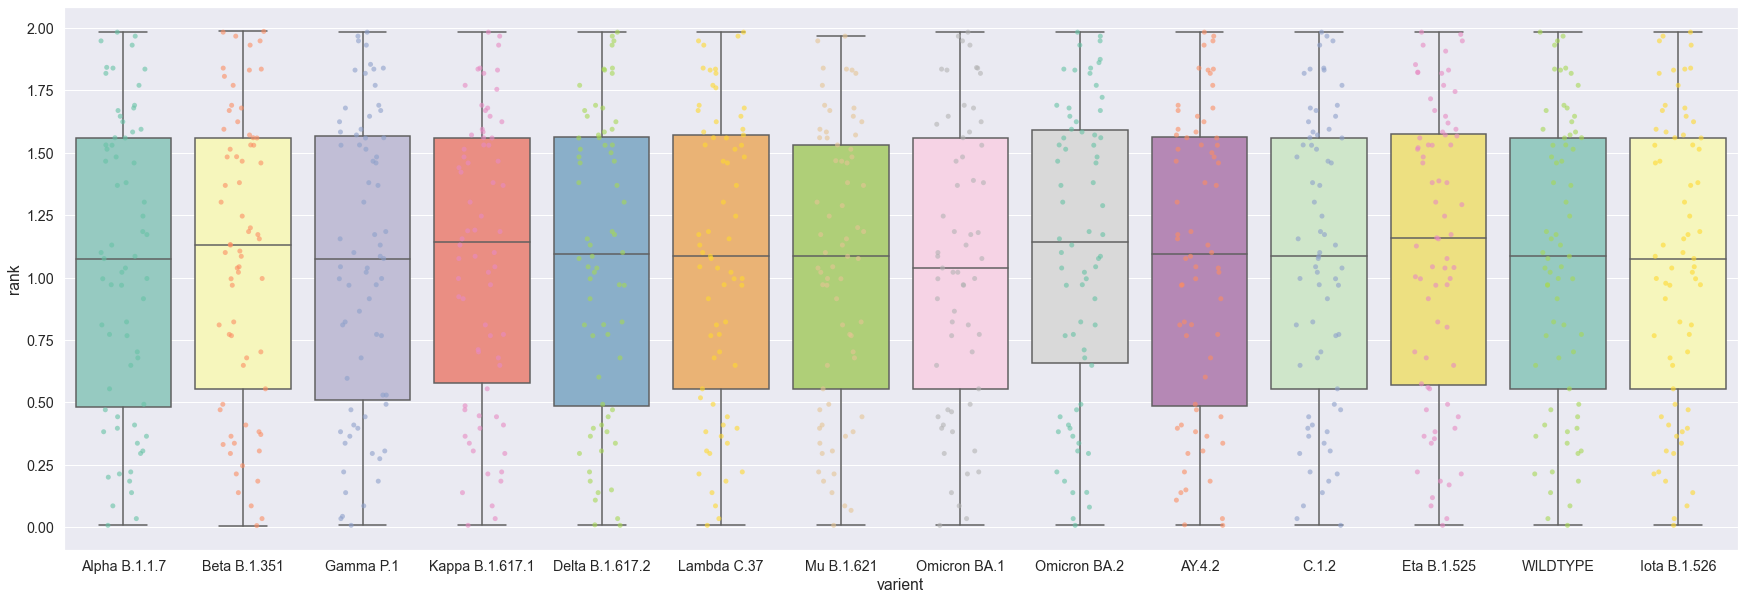

In [42]:
labels = varient_list

sns.set_theme(style="whitegrid")

sns.set(font_scale = 1.3)
plt.figure(figsize = (30,10))

ax = sns.boxplot(x="varient", y="rank",
                 data=binders_df, palette="Set3")

ax = sns.stripplot(x="varient", y="rank",  data=binders_df, ax=ax, palette="Set2", split=True, jitter=0.2, alpha=0.6)

plt.savefig("plots/chopped-rank-boxplot", dpi=500, bbox_inches='tight')

binders change

In [43]:
varient_binders_dict = {}
for var in varient_list:
    varient_binders_dict[var] = {"strong": len(box_df[(box_df["varient"] == var) & (box_df["rank"] <=0.5)]), "weak":len(box_df[(box_df["varient"] == var) & ((box_df["rank"] >0.5) & (box_df["rank"] <=2))]), "non":len(box_df[(box_df["varient"] == var) & (box_df["rank"] >2)])}

print(varient_binders_dict)

{'WILDTYPE': {'strong': 17, 'weak': 52, 'non': 2775}, 'Alpha B.1.1.7': {'strong': 18, 'weak': 49, 'non': 2777}, 'Beta B.1.351': {'strong': 17, 'weak': 52, 'non': 2775}, 'Gamma P.1': {'strong': 18, 'weak': 53, 'non': 2773}, 'Kappa B.1.617.1': {'strong': 17, 'weak': 53, 'non': 2774}, 'Delta B.1.617.2': {'strong': 18, 'weak': 50, 'non': 2776}, 'Lambda C.37': {'strong': 16, 'weak': 53, 'non': 2775}, 'Mu B.1.621': {'strong': 17, 'weak': 52, 'non': 2775}, 'Omicron BA.1': {'strong': 15, 'weak': 46, 'non': 2891}, 'Omicron BA.2': {'strong': 17, 'weak': 53, 'non': 2774}, 'AY.4.2': {'strong': 18, 'weak': 50, 'non': 2776}, 'C.1.2': {'strong': 17, 'weak': 52, 'non': 2775}, 'Eta B.1.525': {'strong': 16, 'weak': 56, 'non': 2772}, 'Iota B.1.526': {'strong': 17, 'weak': 52, 'non': 2775}}


In [44]:
cols = ["varient", "Chopped?","count" ]
rows = []
for var in varient_binders_dict:
    rows.append([var, "strong", varient_binders_dict[var]["strong"]])
    rows.append([var, "weak", varient_binders_dict[var]["weak"]])
    rows.append([var, "non", varient_binders_dict[var]["non"]])
chopped_counter_df = pd.DataFrame(rows, columns=cols)

% of chopped by original

In [46]:
cols = ["varient", "Chopped?","count" ]
rows = []

original_chopped_counter = varient_binders_dict["WILDTYPE"]["strong"]
original_not_chopped_counter = varient_binders_dict["WILDTYPE"]["weak"]
original_non_chopped_counter = varient_binders_dict["WILDTYPE"]["non"]
for var in varient_binders_dict:
    chopped_counter = varient_binders_dict[var]["strong"]
    not_chopped_counter = varient_binders_dict[var]["weak"]
    non_chopped_counter = varient_binders_dict[var]["non"]
    rows.append([var, "strong", 100*(chopped_counter/original_chopped_counter)-100])
    rows.append([var, "weak",100*not_chopped_counter/original_not_chopped_counter-100])
    rows.append([var, "non",100*non_chopped_counter/original_non_chopped_counter-100])
chopped_counter_df = pd.DataFrame(rows, columns=cols)

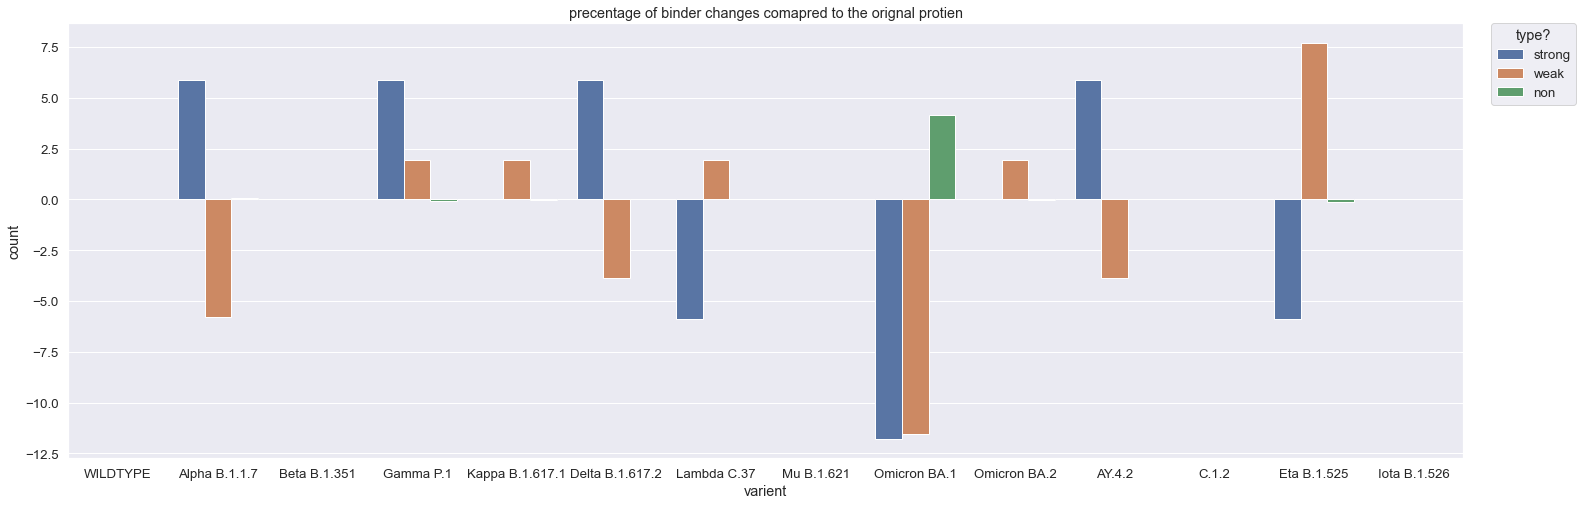

In [47]:
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(25,8)})
sns.set(font_scale = 1.2)
ax = sns.barplot(x="varient", y="count", hue="Chopped?", data=chopped_counter_df)

ax.set_title('precentage of binder changes comapred to the orignal protien')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title="type?")
plt.savefig("plots/varient-binders-change.png", dpi=500, bbox_inches='tight')
